In [3]:
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K

Using TensorFlow backend.


In [36]:
from keras.datasets import mnist
import keras
from keras.layers import Dense, Input # Dense layers are "fully connected" layers
from keras.models import Sequential, Model
import math
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import LambdaCallback

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
image_vector_size = 28*28
image_size = 784
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [47]:
def steep_sigmoid(x):
    return K.sigmoid(20 * x)

In [60]:
def error_data():
    acc = []
    loss_lst = []
    
    inputs = Input(shape=(784,))
    layer1 = Dense(32, activation='relu')(inputs)
    get_custom_objects().update({'steep_sigmoid': Activation(steep_sigmoid)})
    layer2 = Dense(32, activation='steep_sigmoid')(layer1)
    predictions = Dense(10, activation='softmax')(layer2)
    model = Model(inputs=inputs, outputs=predictions)
    print(layer2)
    """model = Sequential()
    model.add(Dense(units=12, activation='sigmoid', input_shape=(image_size,)))
    model.add(Dense(units=num_classes, activation='softmax'))"""
    #print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: print(model.layers[1].get_weights()))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=False, validation_split=.1)#, callbacks = [print_weights])
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    loss_lst.append(loss)
    acc.append(accuracy)
    return (acc, loss_lst)

In [50]:
def custom_loss(layer):
    print(layer)
    weights = layer.weights
    return sum(weights)
    

In [61]:
accuracy, loss_vals = error_data()
print(accuracy)

Tensor("dense_61/activation_7/Sigmoid:0", shape=(?, 32), dtype=float32)
[0.6348000168800354]


0.5023000240325928


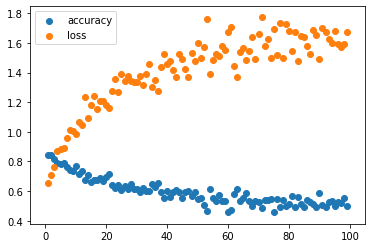

In [77]:
x_vals = list(range(1, 100))
print(accuracy[98])
#print(model.layers())
#for k in x_vals:
    
    #print("For steepness", x_vals[k], "the accuracy is", accuracy[k], "and the loss is", loss_vals[k])

plt.scatter(x_vals, accuracy)
plt.scatter(x_vals, loss_vals)
plt.legend(["accuracy", "loss"])
plt.show()

Steepen the activation function for sigmoid, and see the effect on accuracy   
gradient descent learning vs stochastic  
might need to add more rules  
Antecedents  
weight matrix sparse  
save checkpoints and then start from there next time
Automatic differentiation and gradient tape  
Make error based on how sparse the weight matrix is  
We don't want to train when it's already steep  
Training sparse tensorflow models with keras